# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [35]:
# Start coding here...
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics

## Data Validation

In [36]:
recipe_traffic_df = pd.read_csv("recipe_site_traffic_2212.csv")

In [37]:
recipe_traffic_df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [38]:
recipe_traffic_df.shape

(947, 8)

In [39]:
recipe_traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


### Findings:

Upon loading the dataset into the **`recipe_traffic_df`** DataFrame, several key observations have been made:

1. **Missing Values:**
   - The dataset contains null values in specific columns, including **'calories,' 'carbohydrate,' 'sugar,' 'protein,'** and **'high_traffic.'** Addressing these null values will be crucial for ensuring data completeness.

2. **Object Data Types:**
   - Columns with the **'object'** data type, namely **'category,' 'servings,'** and **'high_traffic,'** require further exploration and preprocessing. Understanding the nature of these categorical or textual columns is essential for effective analysis.

These specific findings provide targeted insights into the columns that need attention during the data cleaning and preparation phase. The next steps will involve addressing null values and optimizing the handling of object-type columns for a comprehensive analysis.


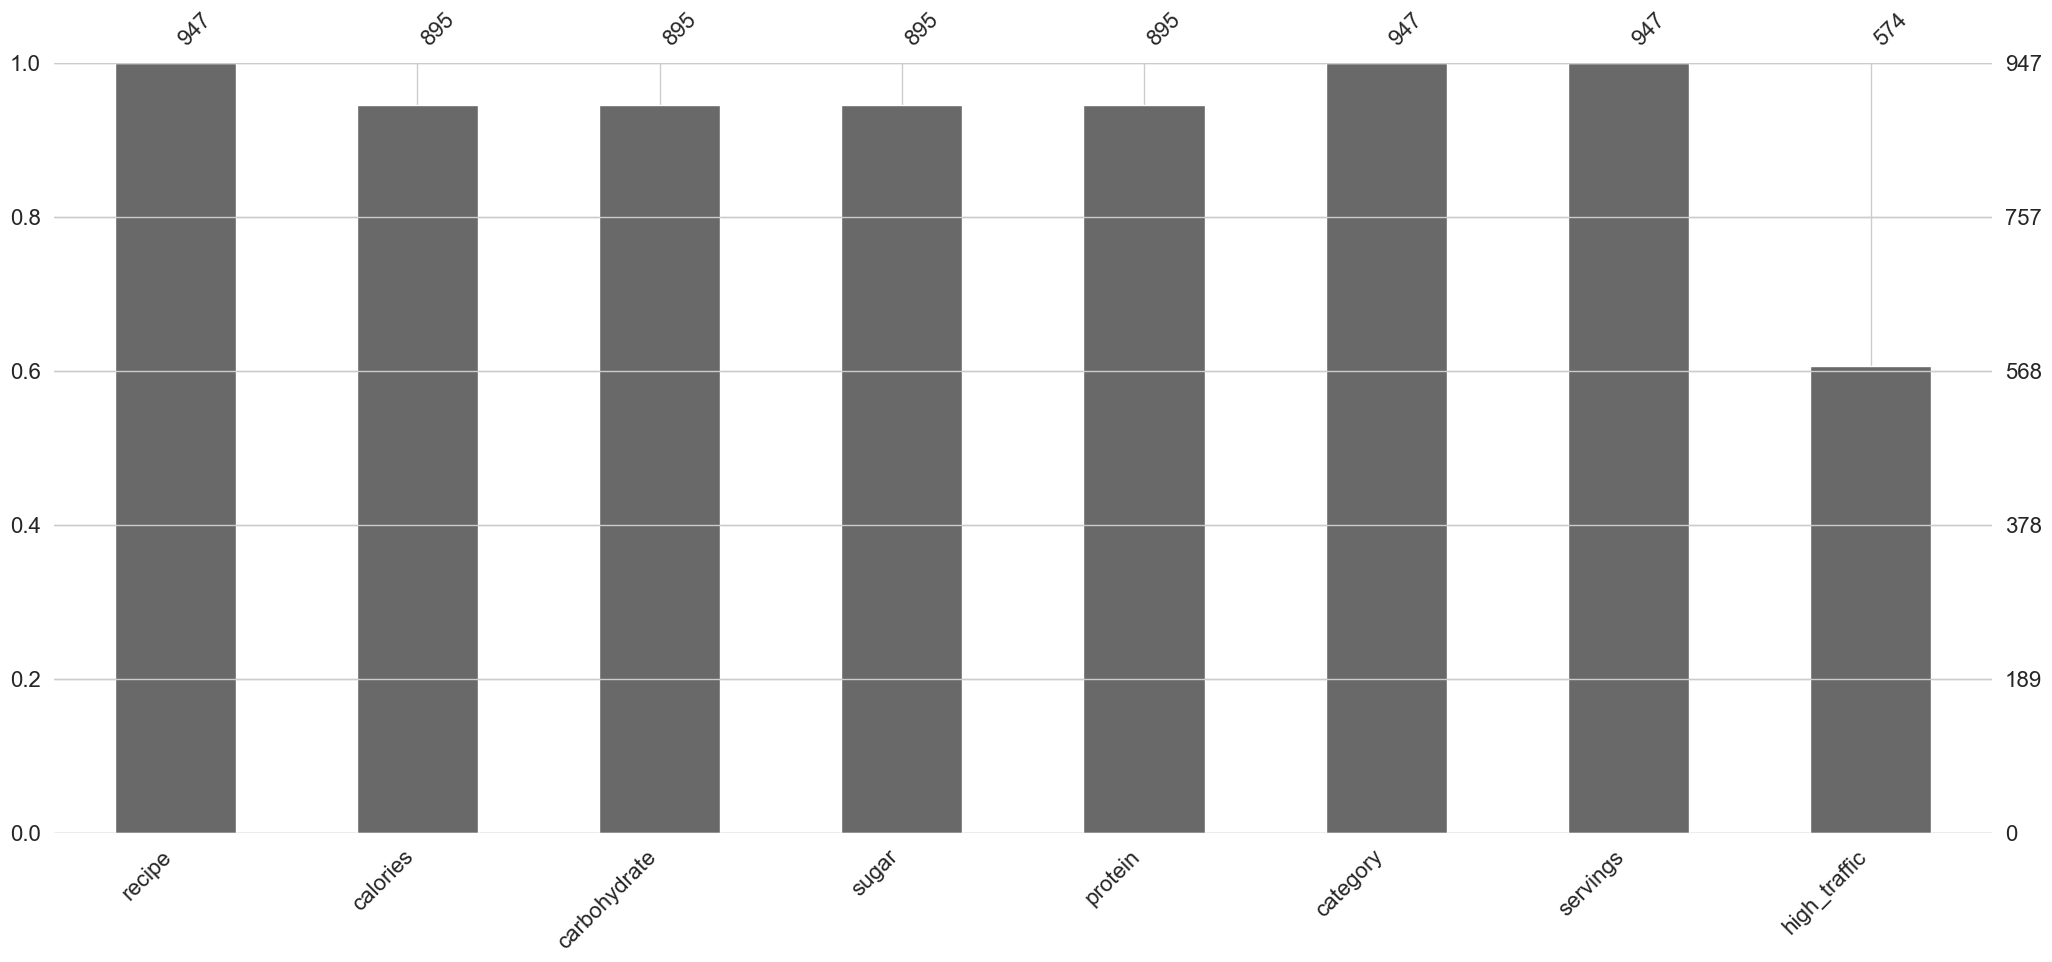

In [40]:
msno.bar(recipe_traffic_df)
plt.show()

Upon visualizing null values in the dataset using `missingno.bar()`, it's observed that columns **'calories,' 'carbohydrate,' 'sugar,' 'protein,'** and **'high_traffic'** share a consistent distribution of null values. Notably, the 'high_traffic' column exhibits a higher number of null values. Given its role as the target variable, addressing and preprocessing null values in the 'high_traffic' column is next step to ensure the integrity of our analysis and modeling process.

In [41]:
recipe_traffic_df['high_traffic'].value_counts()

High    574
Name: high_traffic, dtype: int64

In [42]:
recipe_traffic_df['high_traffic'] = recipe_traffic_df['high_traffic'].fillna('Low')

In [43]:
recipe_traffic_df['high_traffic'].value_counts()

High    574
Low     373
Name: high_traffic, dtype: int64

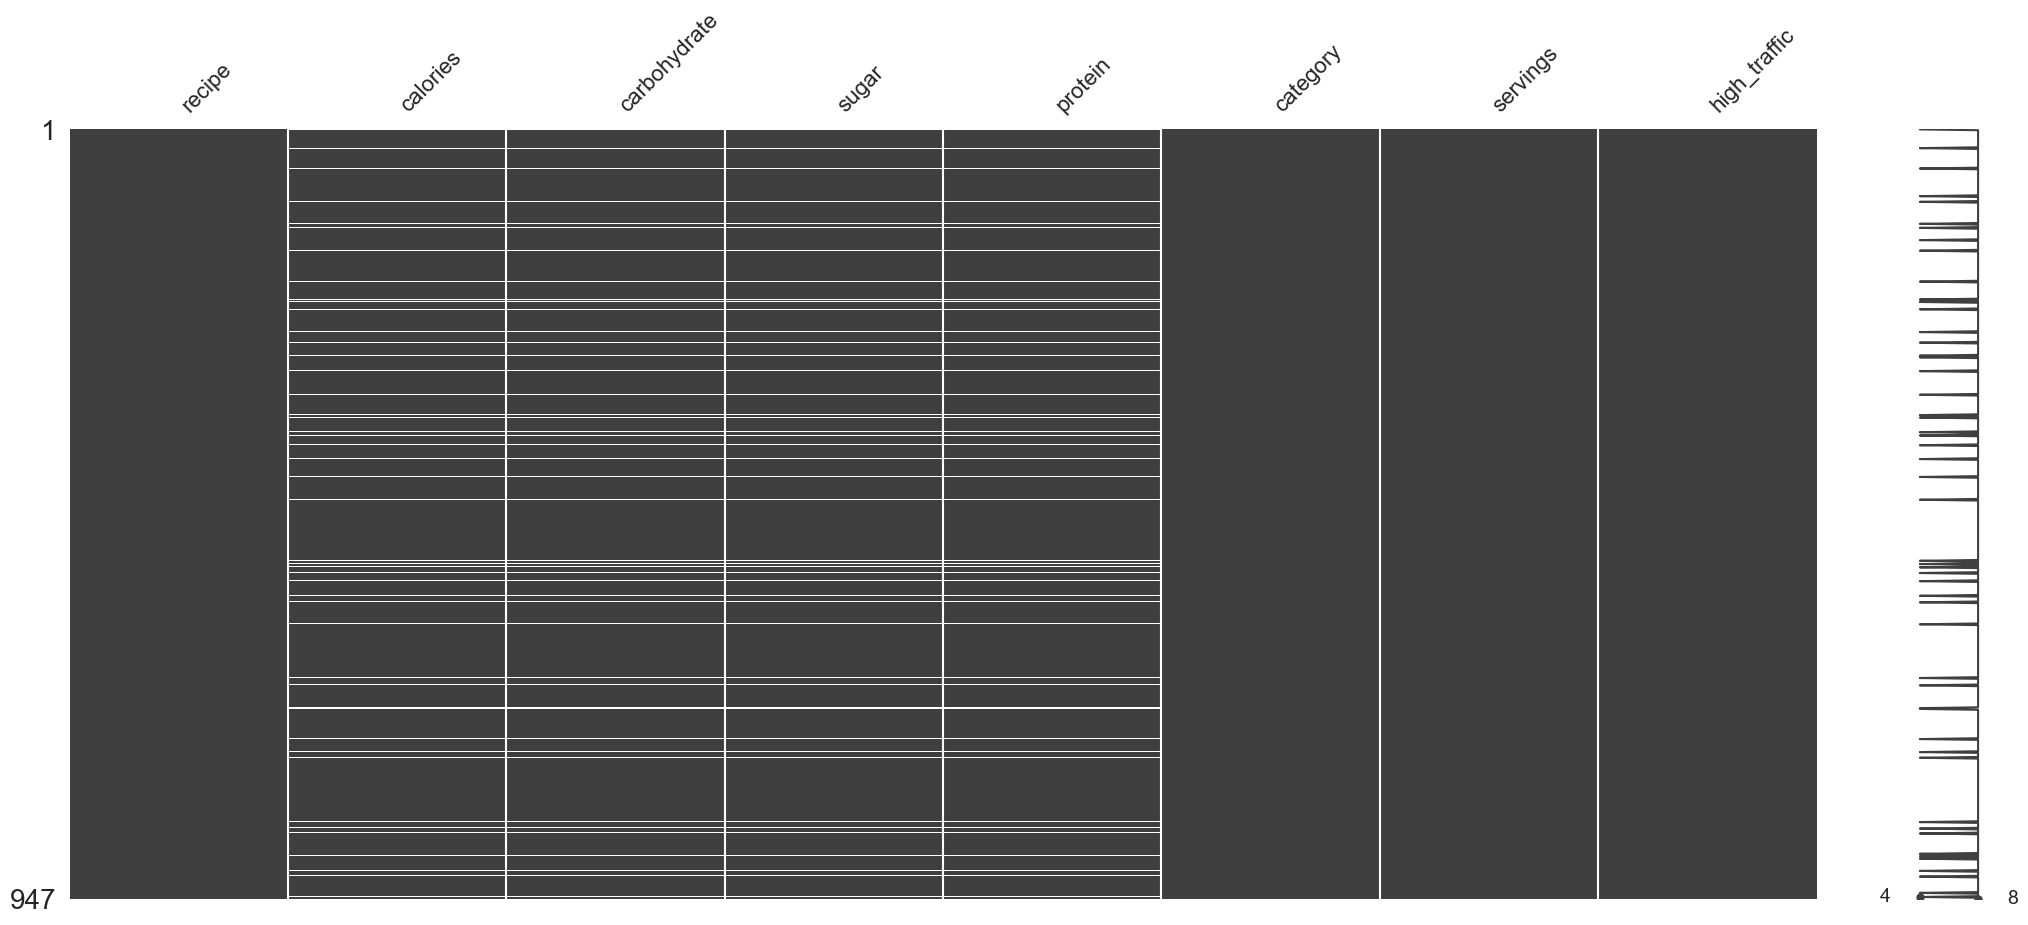

In [44]:
msno.matrix(recipe_traffic_df)
plt.show()

In [45]:
recipe_traffic_df = recipe_traffic_df.dropna()

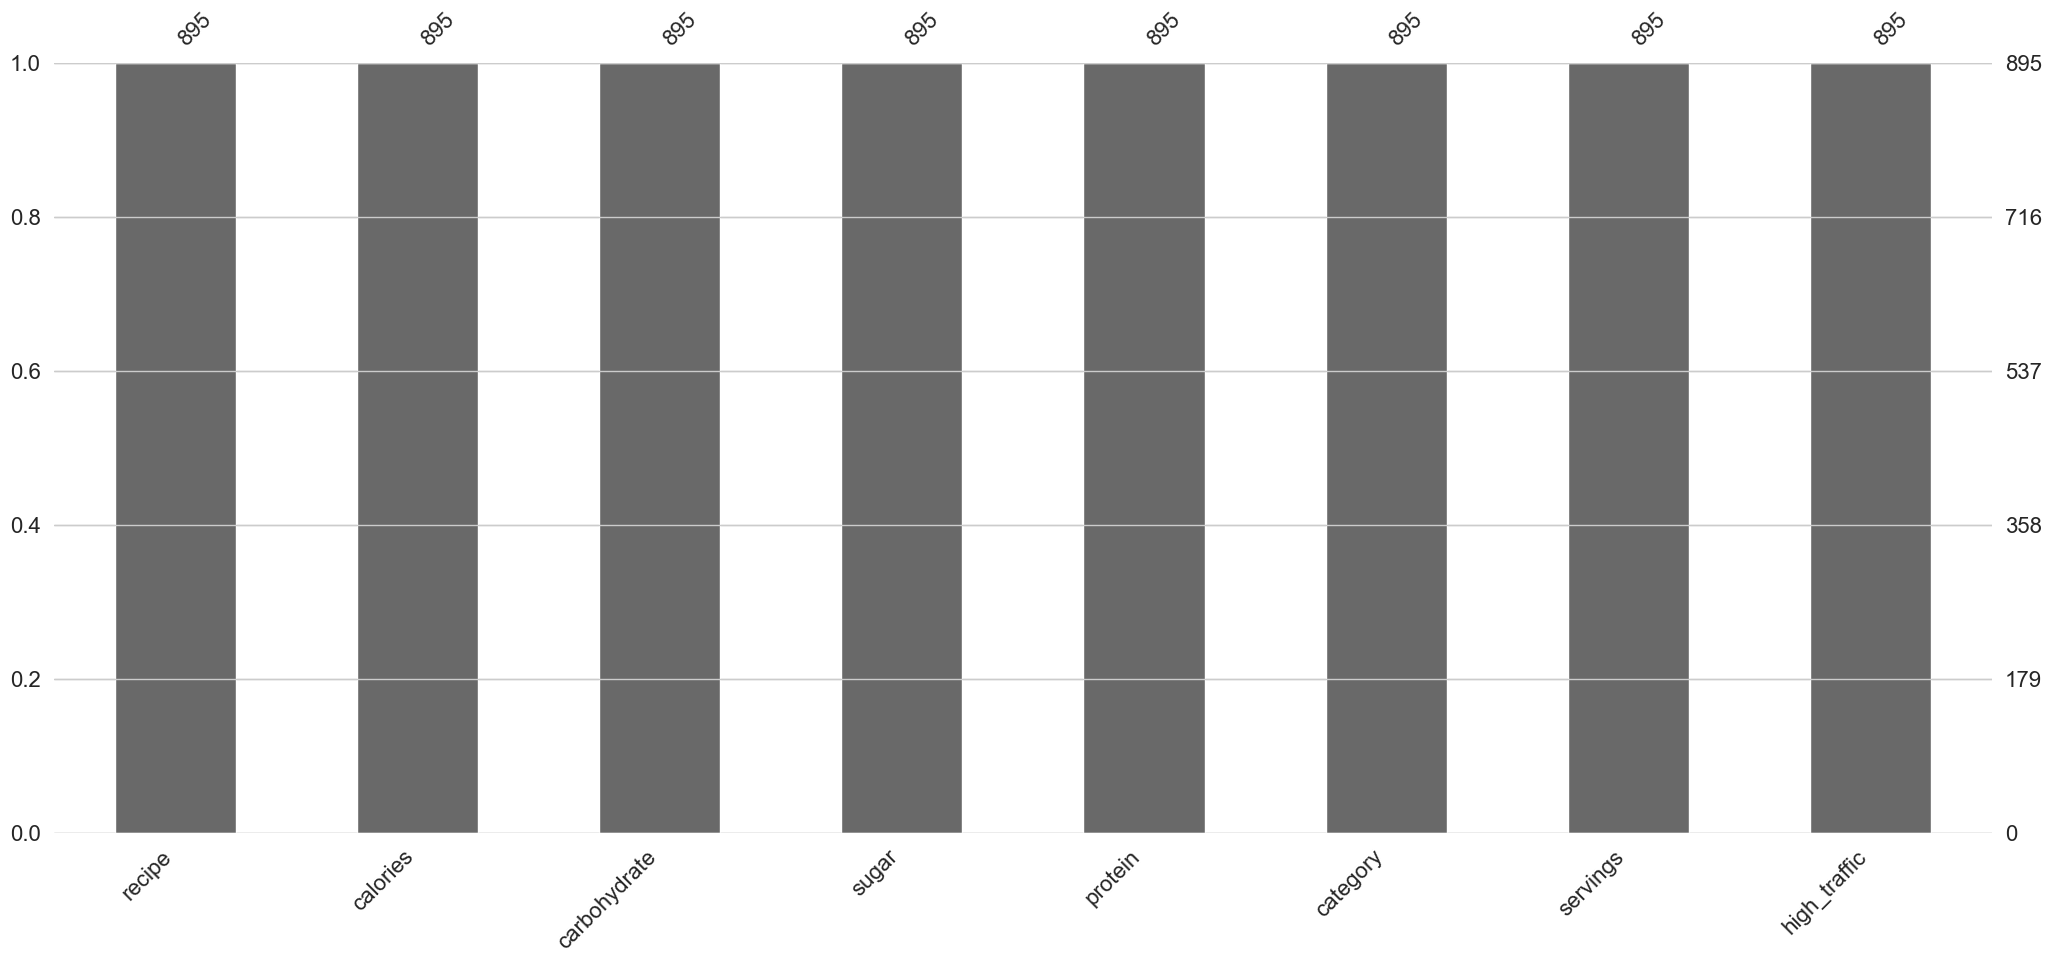

In [46]:
msno.bar(recipe_traffic_df)
plt.show()

Upon examination of the 'high_traffic' column, it was noted that the dataset explicitly records instances of 'High' traffic and omits entries for 'Low' traffic. To address this discrepancy, null values in the 'high_traffic' column, representing 'Low' traffic instances, were replaced with the label 'Low.' The number of occurrences for 'High' and 'Low' traffic was 574 and 373, respectively. Subsequent visualization using `msno.matrix` revealed that the remaining null values in columns **'calories,' 'carbohydrate,' 'sugar,'** and **'protein'** occurred within the same rows and were relatively small in quantity. Given the coherent distribution, dropping these null values was considered acceptable, preserving data integrity while minimizing information loss. The resulting `msno.bar` visualization illustrates the successful handling of null values in the dataset.

## validate object data type columns

In [47]:
recipe_traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        895 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      895 non-null    object 
 6   servings      895 non-null    object 
 7   high_traffic  895 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 62.9+ KB


In [48]:
recipe_traffic_df['category'].value_counts()

Breakfast         106
Chicken Breast     94
Beverages          92
Potato             83
Lunch/Snacks       82
Vegetable          78
Dessert            77
Meat               74
Pork               73
Chicken            69
One Dish Meal      67
Name: category, dtype: int64

In [49]:
recipe_traffic_df['category'] = recipe_traffic_df['category'].str.replace("Chicken Breast" , "Chicken").astype("category")
recipe_traffic_df['category'].value_counts()

Chicken          163
Breakfast        106
Beverages         92
Potato            83
Lunch/Snacks      82
Vegetable         78
Dessert           77
Meat              74
Pork              73
One Dish Meal     67
Name: category, dtype: int64

In [50]:
recipe_traffic_df['servings'].value_counts()

4               365
6               184
2               174
1               169
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

In [51]:
recipe_traffic_df['servings'] = recipe_traffic_df['servings'].str[0].astype("int32")
recipe_traffic_df['servings'].value_counts()

4    367
6    185
2    174
1    169
Name: servings, dtype: int64

In [52]:
recipe_traffic_df['high_traffic'] = recipe_traffic_df['high_traffic'].apply(lambda x : True if x =='High' else False).astype(bool)

In [53]:
recipe_traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        895 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      895 non-null    category
 6   servings      895 non-null    int32   
 7   high_traffic  895 non-null    bool    
dtypes: bool(1), category(1), float64(4), int32(1), int64(1)
memory usage: 47.6 KB


### Handling Data Types:

Upon inspecting the dataset using `recipe_traffic_df.info()`, it was observed that three columns, namely **'category,' 'servings,'** and **'high_traffic,'** had object data types. To optimize memory usage and enhance data consistency, the following steps were taken:

1. **'Category' Column:**
   - The 'category' column, representing recipe categories, was examined for unique values. 'Chicken Breast' entries were replaced with 'Chicken,' and the column was converted to a 'category' data type, reducing memory usage.

2. **'Servings' Column:**
   - The 'servings' column, initially stored as strings, was transformed to integers by extracting the first character and converting it to 'int32,' leading to a more efficient representation.

3. **'High Traffic' Column:**
   - The 'high_traffic' column, serving as the target variable with binary values ('High' or 'Low'), was converted to boolean type, enhancing data clarity and reducing memory usage.

As a result of these datatype optimizations, the dataset's memory usage decreased from 62.9 KB to 47.4 KB, representing a significant reduction of approximately 25%. These steps contribute to a more streamlined and memory-efficient representation of the dataset.


In [54]:
recipe_traffic_df.describe()

,recipe,calories,carbohydrate,sugar,protein,servings
count,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
mean,473.652514,435.939196,35.069676,9.046547,24.149296,3.458101
std,272.763283,453.020997,43.949032,14.679176,36.369739,1.735979
min,2.000000,0.140000,0.030000,0.010000,0.000000,1.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000,2.000000
50%,475.000000,288.550000,21.480000,4.550000,10.800000,4.000000
75%,708.500000,597.650000,44.965000,9.800000,30.200000,4.000000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,6.000000


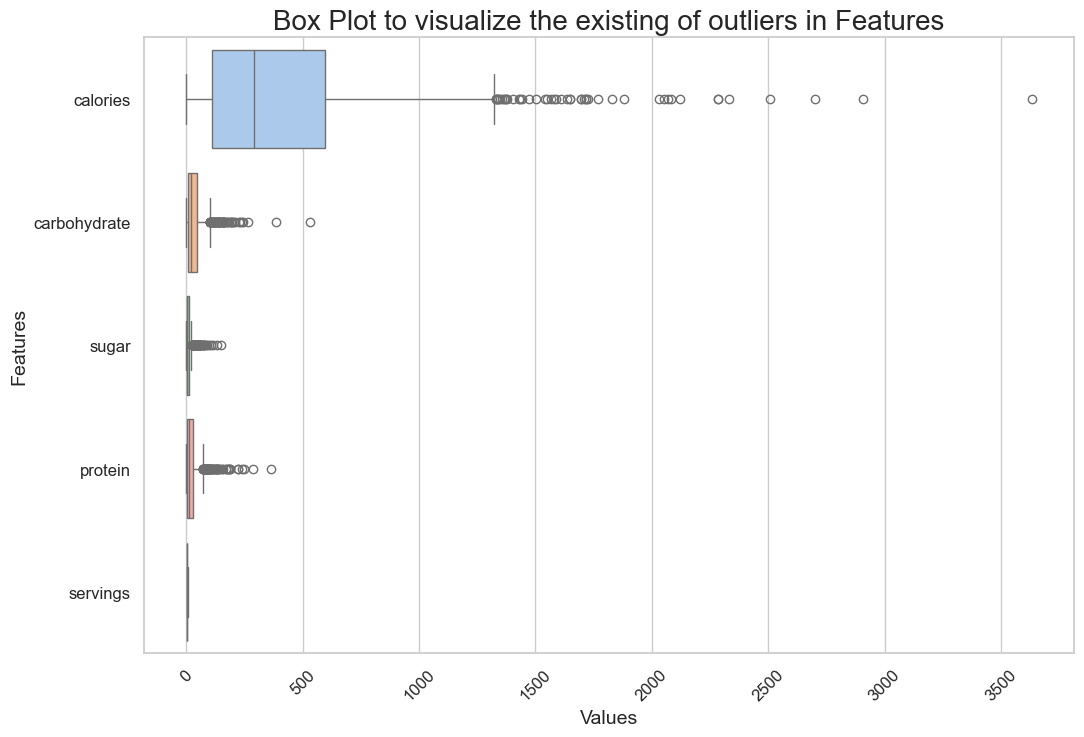

In [55]:

box_plot_columns = ['calories', 'carbohydrate', 'sugar', 'protein', 'servings']
melted_df = pd.melt(recipe_traffic_df, value_vars=box_plot_columns, var_name='Features')
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(data=melted_df, y='Features', x='value', palette="pastel")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Values", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Box Plot to visualize the existing of outliers in Features", fontsize=20)

plt.show()


Upon conducting a detailed analysis using the `recipe_traffic_df.describe()` method, a substantial standard deviation was observed in the numeric columns. To gain further insights into the data distribution and identify potential outliers, a box plot was generated for the columns 'calories', 'carbohydrate', 'sugar', 'protein', and 'servings'. The box plot visually highlighted the presence of outliers in the 'calories', 'carbohydrate', 'sugar', and 'protein' columns. This observation emphasizes the need for additional Exploratory Data Analysis (EDA) to comprehensively understand and address the outliers in these specific columns.

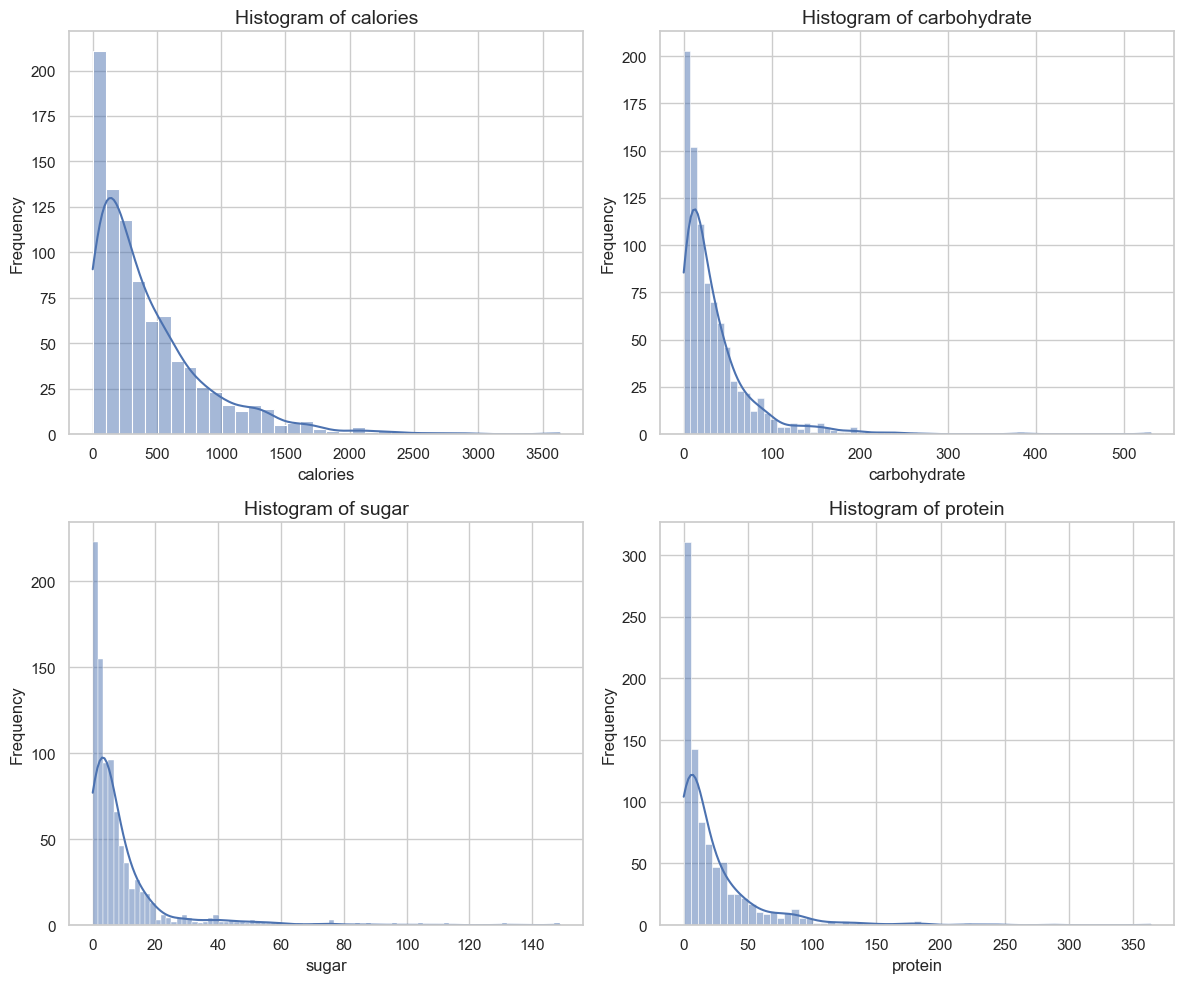

In [56]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

columns = ['calories', 'carbohydrate', 'sugar', 'protein']
for i in range(2):
    for j in range(2):
        current_column = columns[i * 2 + j]
        sns.histplot(recipe_traffic_df[current_column], kde=True, ax=axs[i, j])
        axs[i, j].set_title('Histogram of ' + current_column, fontsize=14)
        axs[i, j].set_xlabel(current_column, fontsize=12)
        axs[i, j].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()

plt.show()

The histograms with kernel density estimation (KDE) illustrate a right-skewed distribution in the 'calories', 'carbohydrate', 'sugar', and 'protein' columns. This skewness indicates a concentration of values on the lower end, with noticeable upper outliers. The visualizations offer valuable insights into the data distribution, specifically highlighting the presence of upper outliers in these key columns, guiding subsequent exploratory data analysis.


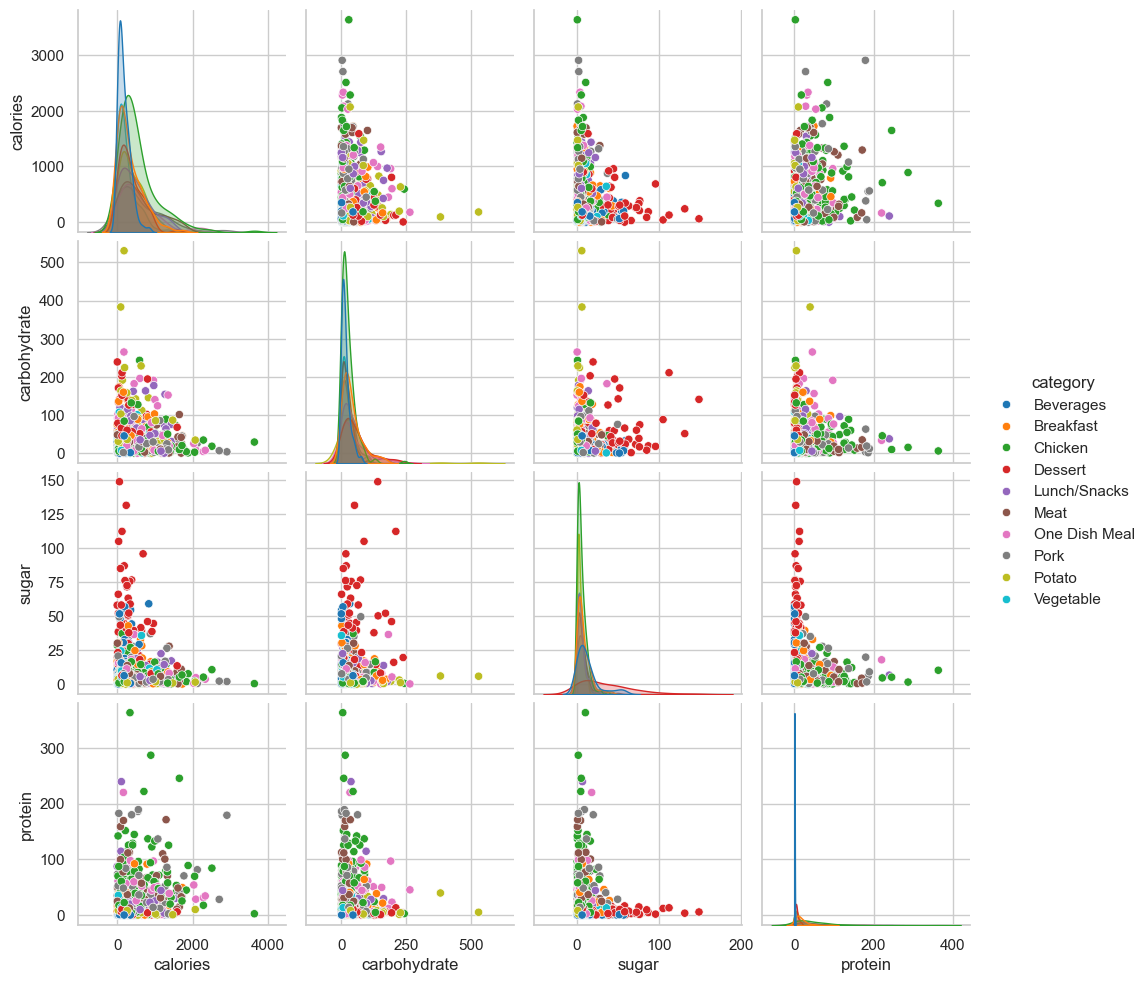

In [57]:
sns.set(style="whitegrid")
columns_of_interest = ['calories', 'carbohydrate', 'sugar', 'protein', 'category']

sns.pairplot(recipe_traffic_df[columns_of_interest], hue='category', palette='tab10')
plt.show()


The pairplot visualization for columns **'calories', 'carbohydrate', 'sugar', and 'protein'** with hue separation based on the **'category'** reveals a distinctive pattern where outliers in these columns are closely tied to specific or related categories. This association suggests that the outliers, rather than being data anomalies, might carry meaningful information specific to their respective categories. Retaining these outliers becomes crucial, as their removal could lead to information loss. To further enhance our understanding, additional exploratory data analysis will be conducted to delve deeper into the insights provided by the **'category'** column. **The decision has been made to keep these outliers intact and leverage robust models like ` Random Forest` , capable of accommodating such variations**. This strategy ensures that the model captures the unique characteristics within each category, contributing to a more accurate and nuanced predictive model.

## **Explore Feature Relations with `high_traffic`**

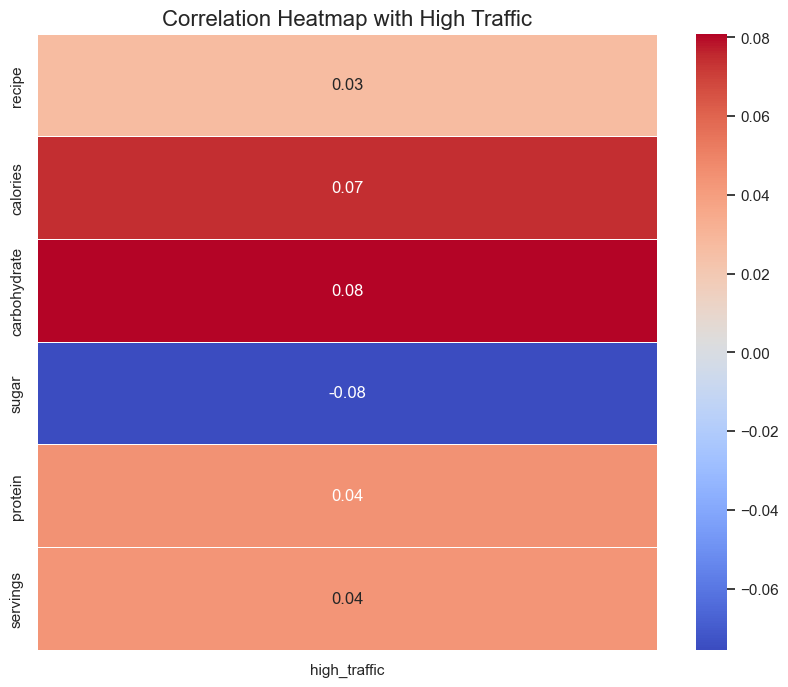

In [58]:
corr = recipe_traffic_df.corr()
corr_df = pd.DataFrame(corr['high_traffic'][:-1])

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap with High Traffic', fontsize=16)
plt.show()


The correlation heatmap provides insights into the relationship between numeric features and the target column 'High Traffic.' It reveals that there is no significant linear correlation, with maximum values around 0.08 and -0.08. This suggests the possibility of non-linear correlations or additional dependencies involving categorical features. Further exploration is warranted to uncover potential associations between the 'High Traffic' variable and other relevant features, contributing to a more comprehensive understanding of the dataset

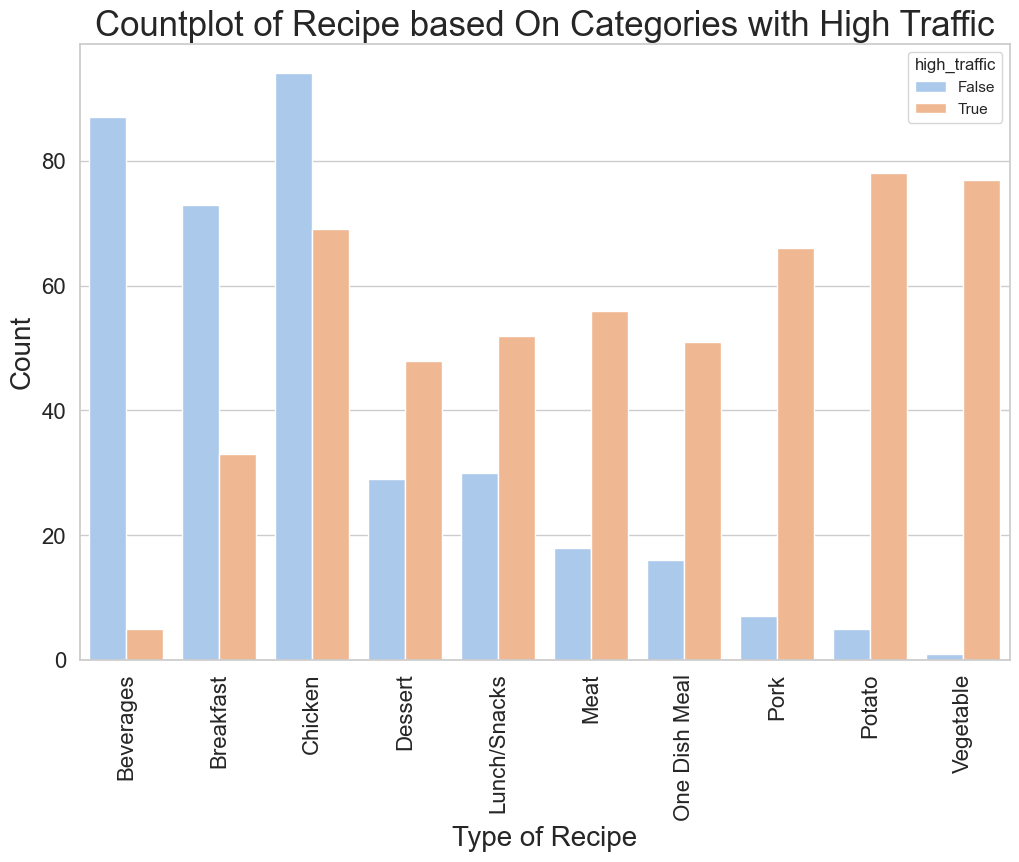

In [59]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='category', hue='high_traffic', data=recipe_traffic_df, palette='pastel')

plt.xlabel('Type of Recipe', fontsize = 20 , fontweight = 20)
plt.ylabel('Count', fontsize = 20 , fontweight = 20)
plt.title('Countplot of Recipe based On Categories with High Traffic', fontsize=25 , fontweight = 25)
plt.xticks(rotation=90 , fontsize = 16 , fontweight = 15)
plt.yticks( fontsize = 16 , fontweight = 15)
plt.show()


The count plot for `Recipe Categories` unveils variations in traffic distribution across different categories. Notably, categories such as **Beverages** show a substantial prevalence of low traffic, while **Potato** and **vegetable** categories exhibit a higher frequency of recipes with high traffic. This insight suggests potential areas of focus and adjustment for the company's recipe portfolio, emphasizing the importance of optimizing recipe categories to attract more traffic and meet user preferences.

# Model Fitting and Evaluation:

Predicting high-traffic recipes is a classification problem in machine learning. We chose Logistic Regression as our baseline model due to its simplicity, ease of implementation, and suitability for small datasets. Our project objective is to correctly predict high-traffic recipes 80% of the time, emphasizing precision.

For comparison, we selected the Random Forest classifier, known for its resilience to outliers and ability to handle small datasets. This decision was motivated by the unique characteristics of our dataset, aiming to further enhance the model’s accuracy and predictive capabilities.


In [60]:
# One-hot encode 'category' column
category_dummies = pd.get_dummies(recipe_traffic_df['category'])
recipe_traffic_df = pd.concat([recipe_traffic_df, category_dummies], axis=1)

# Prepare features and target variables
features = recipe_traffic_df.drop(["recipe", "high_traffic", "category"], axis=1)
target = recipe_traffic_df['high_traffic']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=3)

In [61]:
logistic_model = LogisticRegression(random_state=20)

logistic_model.fit(X_train, y_train)

logistic_predictions = logistic_model.predict(X_test)

classification_report_logistic = metrics.classification_report(y_test, logistic_predictions)
print("Logistic Regression Classification Report:\n", classification_report_logistic)


Logistic Regression Classification Report:
               precision    recall  f1-score   support

       False       0.67      0.69      0.68        84
        True       0.81      0.79      0.80       140

    accuracy                           0.75       224
   macro avg       0.74      0.74      0.74       224
weighted avg       0.76      0.75      0.76       224



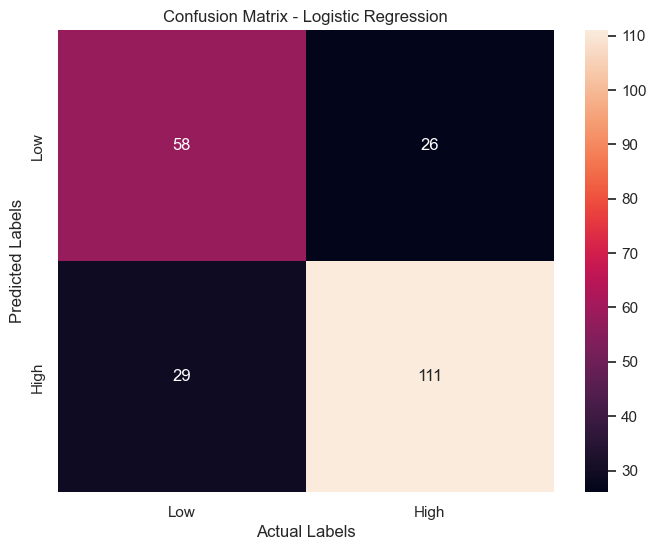

In [62]:
confusion_matrix_logistic = metrics.confusion_matrix(y_test, logistic_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_logistic, annot=True, fmt='.3g', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


## Random Forest Classifier

In [63]:

random_forest_model = RandomForestClassifier(random_state=20)
random_forest_model.fit(X_train, y_train)
rf_predictions = random_forest_model.predict(X_test)

print(metrics.classification_report(y_test, rf_predictions))


              precision    recall  f1-score   support

       False       0.65      0.67      0.66        84
        True       0.80      0.79      0.79       140

    accuracy                           0.74       224
   macro avg       0.72      0.73      0.73       224
weighted avg       0.74      0.74      0.74       224



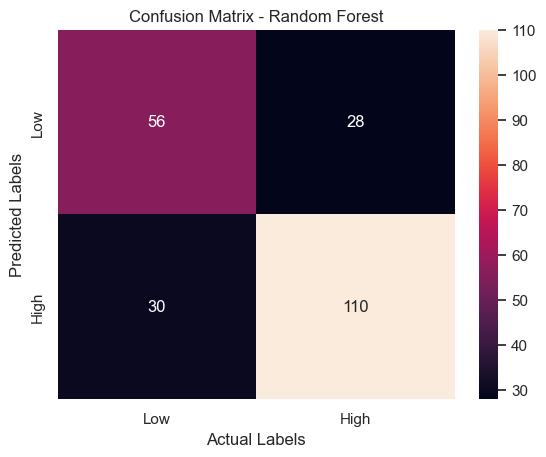

In [64]:

confusion_matrix_rf = metrics.confusion_matrix(y_test, rf_predictions)
heatmap_labels = ['Low', 'High']
ax = sns.heatmap(confusion_matrix_rf, annot=True, fmt='.3g', xticklabels=heatmap_labels, yticklabels=heatmap_labels)
ax.set(xlabel="Actual Labels", ylabel="Predicted Labels")
plt.title("Confusion Matrix - Random Forest")
plt.show()


### Finding the feature importance

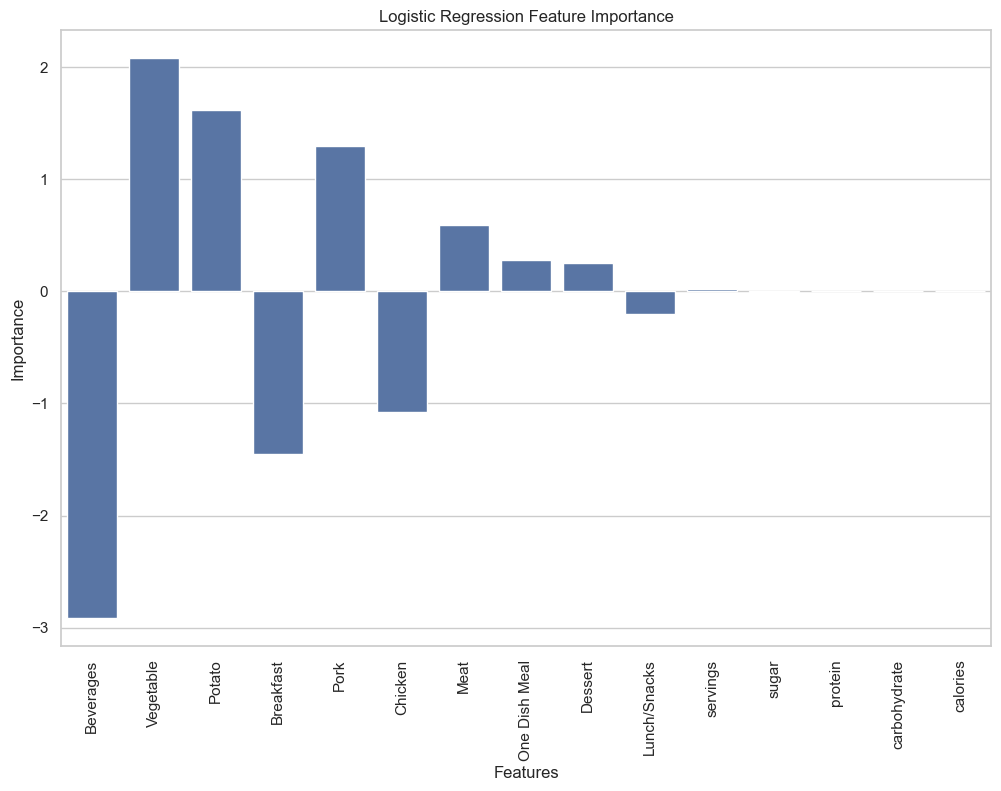

In [65]:

feature_importance = {col: coef for col, coef in zip(features.columns, logistic_model.coef_[0])}
plt.figure(figsize=(12, 8))

sorted_features = sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)
sns.barplot(x=[item[0] for item in sorted_features], y=[item[1] for item in sorted_features])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Logistic Regression Feature Importance')
plt.show()

In [66]:

selected_columns = [col for col, importance in feature_importance.items() if abs(importance) > 0.05]

print(f"Selected columns are:\n{selected_columns}")

Selected columns are:
['Beverages', 'Breakfast', 'Chicken', 'Dessert', 'Lunch/Snacks', 'Meat', 'One Dish Meal', 'Pork', 'Potato', 'Vegetable']


## Result of examining Feature Importance Of Selected Model
While examining feature importance through logistic regression, it becomes evident that only the 'category' (type of recipe) feature exhibits visible importance, surpassing the 0.05 baseline. Surprisingly, other columns such as 'calories,' 'carbohydrate,' 'sugar,' 'protein,' and 'servings' fall below this threshold, suggesting their limited contribution to predicting high traffic. Consequently, we conclude that focusing solely on the 'category' feature is sufficient for efficient high traffic prediction. Subsequent steps will involve training the model exclusively with the 'category' feature to evaluate its performance.

### Retrain Logistic Regression with Selected Features

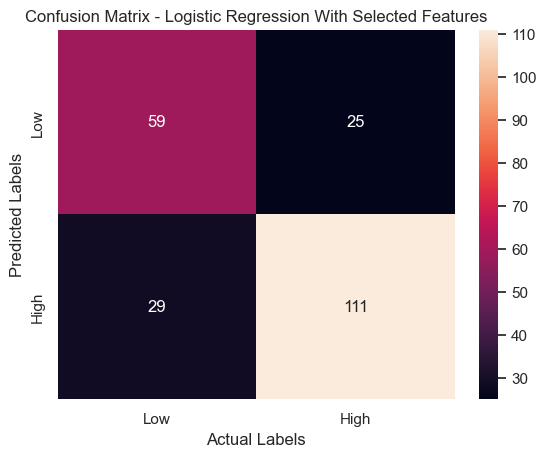

Classification Report:
               precision    recall  f1-score   support

       False       0.67      0.70      0.69        84
        True       0.82      0.79      0.80       140

    accuracy                           0.76       224
   macro avg       0.74      0.75      0.75       224
weighted avg       0.76      0.76      0.76       224



In [67]:
# Selecting features based on importance
selected_features = recipe_traffic_df[selected_columns]

# Splitting the data
X_train_selected, X_test_selected, y_train, y_test = train_test_split(selected_features, target, test_size=0.25, random_state=3)

logistic_model_selected = LogisticRegression(random_state=20)
logistic_model_selected.fit(X_train_selected, y_train)

logistic_pred_selected = logistic_model_selected.predict(X_test_selected)


classification_report_selected = metrics.classification_report(y_test, logistic_pred_selected)


cm_selected = metrics.confusion_matrix(y_test, logistic_pred_selected)


ax_selected = sns.heatmap(cm_selected, annot=True, fmt='.3g', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
ax_selected.set(xlabel="Actual Labels", ylabel="Predicted Labels" , title = "Confusion Matrix - Logistic Regression With Selected Features")
plt.show()

print("Classification Report:\n", classification_report_selected)


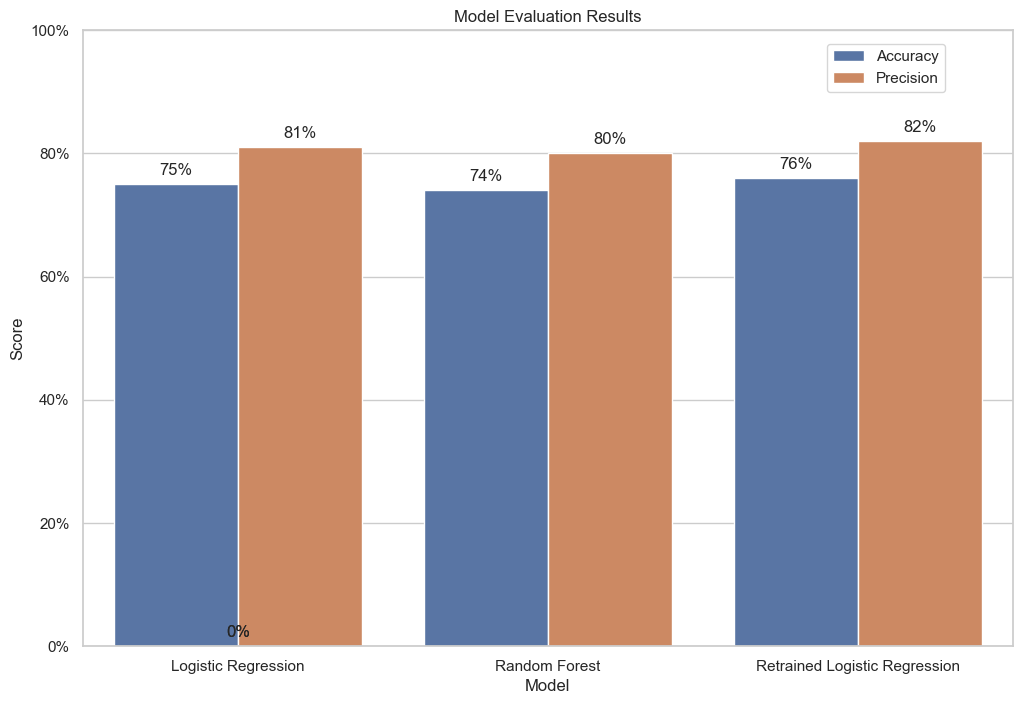

In [68]:
df = pd.DataFrame({
    'Model':['Logistic Regression', 'Random Forest', 'Retrained Logistic Regression'],
    'Accuracy': [0.75, 0.74, 0.76],  
    'Precision': [0.81, 0.80, 0.82]  
})

df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 8))
barplot = sns.barplot(y='Score', x='Model', hue='Metric', data=df_melted)
plt.title('Model Evaluation Results')
plt.ylim(0, 1)
plt.legend(loc = (0.8 , 0.9))

locs, labels = plt.yticks()
plt.yticks(locs, [f'{i*100:.0f}%' for i in locs])

for p in barplot.patches:
    barplot.annotate(f'{p.get_height()*100:.0f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

plt.show()

# Evaluation Result
The baseline `Logistic Regression` model **achieved 75% accuracy and 81% precision**, aligning with our project objective. After implementing the `Random Forest classifier`, we obtained an **accuracy of 74% and precision of 80%**, slightly below the performance achieved by Logistic Regression. Despite not surpassing our baseline, the precision remains aligned with our project objective.

Based on the analysis of **feature importance**, we selectively retained features with importance scores exceeding a baseline threshold of 0.05. Subsequently, retraining our `Logistic Regression` model using these pertinent features yielded notable improvements. The refined model achieved an **accuracy of 76% and precision of 82%**, underscoring the effectiveness of feature selection in enhancing predictive performance. This outcome reinforces the significance of the ‘category’ column in accurately and precisely predicting high traffic. The streamlined model not only exhibits improved efficiency but also highlights the importance of thoughtful feature selection in refining predictive models.

## Business Focus & Metrics

Our business goals for this data science project are twofold:

1. To predict which recipes will have high traffic.
2. To predict the "High" value of traffic of the recipes with 80% probability.

To align our model evaluation with these business goals, we use **precision** as our Key Performance Indicator (KPI). Precision is a measure of the accuracy of the model when it predicts a positive class. In our case, a positive class is a recipe that the model predicts will have high traffic.

The formula for precision is:

$$ \text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP) + False Positives (FP)}} $$

Where:
- **True Positives (TP)**: The number of recipes correctly predicted as high traffic.
- **False Positives (FP)**: The number of recipes incorrectly predicted as high traffic.

A high precision indicates that when the model predicts a recipe will have high traffic, it is correct a high percentage of the time. This aligns directly with our second business goal of predicting the "High" value of traffic of the recipes with 80% probability.

In our project, both the Logistic Regression model and the Random Forest model achieved a precision of 80% or higher, meeting our business baseline. This demonstrates that our models are not only statistically sound but also aligned with our business objectives.


# Final Summary and Recommendations

Our data science project aimed to predict which recipes will have high traffic with a precision of 80%. After implementing and evaluating various models, the Logistic Regression model emerged as the most suitable choice. It not only achieved a precision of over 80%, aligning with our business goal, but also offered simplicity and interpretability, making it a preferable choice for our project.

A key insight from our project was the importance of the 'category' feature in predicting high traffic. Our analysis revealed that the 'category' feature was the most significant predictor, surpassing other features such as 'calories,' 'carbohydrate,' 'sugar,' 'protein,' and 'servings.' This finding suggests that focusing on the 'category' feature can lead to efficient high traffic prediction, reducing the cost and complexity of data collection.

Further analysis of recipe categories unveiled variations in traffic distribution across different categories. Notably, categories such as "Vegetable" and "Potato" exhibited a higher frequency of recipes with high traffic, making them recommended candidates for inclusion on the platform. Conversely, recipes categorized as "Beverages" typically resulted in low traffic, suggesting they should not be prominently featured on the platform.

### Based on these findings, we recommend the following actions:

1. **Focus on Category Feature:** Given its significant role in predicting high traffic, we recommend focusing on the 'category' feature for future model training and prediction. This approach will not only enhance the model's performance but also reduce the cost and complexity of data collection.

2. **Optimize Recipe Portfolio:** Our analysis suggests potential areas of focus and adjustment for the company's recipe portfolio. We recommend emphasizing categories such as "Vegetable" and "Potato" that tend to generate high traffic. At the same time, categories like "Beverages" that typically result in low traffic should be less prominent on the platform.

3. **Continuous Model Evaluation:** While our current model meets the business goal, continuous evaluation and refinement are crucial to maintain its performance. We recommend regular model evaluation and updates to ensure it continues to align with the business objectives.

By implementing these recommendations, the business can optimize its recipe portfolio, attract more traffic, and meet user preferences more effectively.


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation